In [4]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
from io import BytesIO
from pandas.io.json import json_normalize
from statsmodels.tsa.stattools import adfuller
import seaborn as sns
import statsmodels.api as sm
from matplotlib.pylab import rcParams

Creating a dataframe where I gather data from the Pudgy Penguins collection. I am selecting this because it is a collection that falls under the Top 20 highest volume collections on Opensea of all time, and the current price point is on the lower scale with a floor (at the time of writing) of 1.12 ETH. 

In [5]:
pp_events_1 = []
for offset in range(0,6000,50):
    url = "https://api.opensea.io/api/v1/events?only_opensea=true&collection_slug=pudgypenguins&occurred_after=2021-07-19T22:32:47.007226"
    querystring = {"offset":f"{offset}","limit":"50", 'event_type': 'successful'}
    headers = {"X-API-KEY": "API-KEY-HERE"}
    response = requests.request("GET", url, headers=headers, params=querystring)
    json = response.json()
    df = json_normalize(json['asset_events'])
    pp_events_1.append(df)
    print(f"Offset is {offset} and {len(df)} assets added")
pudgy_data = pd.concat([df for df in pp_events_1], ignore_index=True, sort=False)
print("")
print("")

<ipython-input-5-c05d9a52e65c>:8: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df = json_normalize(json['asset_events'])


Offset is 0 and 50 assets added
Offset is 50 and 50 assets added
Offset is 100 and 50 assets added
Offset is 150 and 50 assets added
Offset is 200 and 50 assets added
Offset is 250 and 50 assets added
Offset is 300 and 50 assets added
Offset is 350 and 50 assets added
Offset is 400 and 50 assets added
Offset is 450 and 50 assets added
Offset is 500 and 50 assets added
Offset is 550 and 50 assets added
Offset is 600 and 50 assets added
Offset is 650 and 50 assets added
Offset is 700 and 50 assets added
Offset is 750 and 50 assets added
Offset is 800 and 50 assets added
Offset is 850 and 50 assets added
Offset is 900 and 50 assets added
Offset is 950 and 50 assets added
Offset is 1000 and 50 assets added
Offset is 1050 and 50 assets added
Offset is 1100 and 50 assets added
Offset is 1150 and 50 assets added
Offset is 1200 and 50 assets added
Offset is 1250 and 50 assets added
Offset is 1300 and 50 assets added
Offset is 1350 and 50 assets added
Offset is 1400 and 50 assets added
Offset i

In [6]:
pudgy_data

,approved_account,asset_bundle,auction_type,bid_amount,collection_slug,contract_address,created_date,custom_event_name,dev_fee_payment_event,duration,...,asset_bundle.permalink,asset_bundle.sell_orders,dev_fee_payment_event.transaction.from_account.user,dev_fee_payment_event.transaction.from_account.profile_img_url,dev_fee_payment_event.transaction.from_account.address,dev_fee_payment_event.transaction.from_account.config,dev_fee_payment_event.transaction.to_account.user,dev_fee_payment_event.transaction.to_account.profile_img_url,dev_fee_payment_event.transaction.to_account.address,dev_fee_payment_event.transaction.to_account.config
0,None,None,None,None,pudgypenguins,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,2021-11-30T04:55:10.583259,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,None,None,None,None,pudgypenguins,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,2021-11-30T04:51:55.670198,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,None,None,None,None,pudgypenguins,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,2021-11-30T03:51:46.229835,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,None,None,None,None,pudgypenguins,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,2021-11-30T03:48:55.066759,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,None,None,None,None,pudgypenguins,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,2021-11-30T03:48:38.868786,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,None,None,None,None,pudgypenguins,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,2021-08-24T06:17:21.650842,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5996,None,None,None,None,pudgypenguins,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,2021-08-24T06:13:48.896476,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5997,None,None,None,None,pudgypenguins,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,2021-08-24T06:13:00.189498,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5998,None,None,None,None,pudgypenguins,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,2021-08-24T06:11:55.189434,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
pudgy_data["created_date"] = pd.to_datetime(pudgy_data["created_date"])

In [9]:
pudgy_data = pudgy_data.set_index(pudgy_data["created_date"])

In [11]:
pudgy_data.head()

,approved_account,asset_bundle,auction_type,bid_amount,collection_slug,contract_address,created_date,custom_event_name,dev_fee_payment_event,duration,...,asset_bundle.permalink,asset_bundle.sell_orders,dev_fee_payment_event.transaction.from_account.user,dev_fee_payment_event.transaction.from_account.profile_img_url,dev_fee_payment_event.transaction.from_account.address,dev_fee_payment_event.transaction.from_account.config,dev_fee_payment_event.transaction.to_account.user,dev_fee_payment_event.transaction.to_account.profile_img_url,dev_fee_payment_event.transaction.to_account.address,dev_fee_payment_event.transaction.to_account.config
created_date,,,,,,,,,,,,,,,,,,,,,
2021-11-30 04:55:10.583259,None,None,None,None,pudgypenguins,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,2021-11-30 04:55:10.583259,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-30 04:51:55.670198,None,None,None,None,pudgypenguins,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,2021-11-30 04:51:55.670198,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-30 03:51:46.229835,None,None,None,None,pudgypenguins,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,2021-11-30 03:51:46.229835,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-30 03:48:55.066759,None,None,None,None,pudgypenguins,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,2021-11-30 03:48:55.066759,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-30 03:48:38.868786,None,None,None,None,pudgypenguins,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,2021-11-30 03:48:38.868786,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


I want to create a function where I perform the necessary transformations (such as the above) to the dataset automatically after import from the API.

In [16]:
def opensea_to_dt(df): 
    df["created_date"] = pd.to_datetime(df["created_date"])
    df2 = df.set_index(df["created_date"])
    return df2

In [17]:
def fix_prices(price):
    return price * 9.999999999999999e-19

In [18]:
def opensea_df_clean(df):
    df["total_price"].dropna(inplace=True)
    df["total_price"] = pd.to_numeric(df["total_price"], downcast="float", errors="coerce")
    df['total_price_eth'] = df["total_price"].apply(fix_prices)
    df_columns_keep = ["id", "quantity", "total_price_eth", "asset.id", "asset.token_id", "asset.num_sales", 
                   "asset.name", "seller.address", "transaction.block_hash", "transaction.block_number",
                  "transaction.id", "transaction.timestamp", "transaction.transaction_hash", "transaction.transaction_index",
                  "winner_account.address"]
    new_df = df[df_columns_keep]
    return new_df

Let's try opensea_df_clean on our pudgy data.

In [16]:
pudgy2 = opensea_df_clean(pudgy_data)

In [17]:
pudgy2

,id,quantity,total_price_eth,asset.id,asset.token_id,asset.num_sales,asset.name,seller.address,transaction.block_hash,transaction.block_number,transaction.id,transaction.timestamp,transaction.transaction_hash,transaction.transaction_index,winner_account.address
created_date,,,,,,,,,,,,,,,
2021-11-30 04:55:10.583259,2245898989,1,1.1400,32451727.0,2473,6.0,Pudgy Penguin #2473,0x98b33d164e41d7a0a7eb6393d8e92d183f4a92bd,0xbc66ad48f303576f9287830714f57a3b974adfce78f2...,13712870,212307599,2021-11-30T04:54:42,0xa118f1d477e8e4915afeb4cf75d62d87dfbd37259c7b...,196,0x8b16008ce9cbea16c5152eb366cc35b478639af7
2021-11-30 04:51:55.670198,2245854433,1,2.5999,32458946.0,8726,5.0,Pudgy Penguin #8726,0x3d620bd5e05b3896081646e6cbedcbc9cb860d5f,0xee29688b98109e2f18943d58a6fa8f05c8c83b26d2fa...,13712847,212306027,2021-11-30T04:51:39,0xdbf25b08355444f2c8a75172661365e0978fc34ed4f4...,226,0x304a97c9a85c92c93ca24e0a85b69f892b67355e
2021-11-30 03:51:46.229835,2245023606,1,1.0990,32457972.0,7854,4.0,Pudgy Penguin #7854,0x9d81b6f001bd7e5fcd71713519aab5f27f2a8415,0x93ba725dd041e7d05a806a799c789ef15e0cb72dc28f...,13712597,212275246,2021-11-30T03:50:42,0xa55da48394f41280b33080086e8e135b9bc16d9a521d...,409,0x78b15fef736f94a717a8e8d29380ef87b0824827
2021-11-30 03:48:55.066759,2244984457,1,1.1499,32459104.0,8778,5.0,Pudgy Penguin #8778,0x3d620bd5e05b3896081646e6cbedcbc9cb860d5f,0xed19134161eff1cb6c3326733eb5fb1e455c5a48ac69...,13712585,212274170,2021-11-30T03:48:25,0xc416a5c30b70dbc8b2234d5da85a5c29048353477611...,201,0x78b15fef736f94a717a8e8d29380ef87b0824827
2021-11-30 03:48:38.868786,2244980842,1,1.1000,32458746.0,8469,4.0,Pudgy Penguin #8469,0x7055d2b309057d3396f7d005c8e1d61269b993a0,0x8a493330f77554374bd5bcec4b8e917b57d866304791...,13712584,212274051,2021-11-30T03:48:22,0xbb9566b1d1b868b2d7e2fbd640133e0c53f0696c471a...,56,0x4ac92d9a71724ed484e5e3ed61b290e18d825400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-24 06:17:21.650842,619139237,1,3.4000,32449454.0,629,1.0,Pudgy Penguin #629,0xb38bd68a6f0ba599808d65c7a9cf2a428105b680,0x8543082bb01e230eb43b266be894341142c27400d338...,13086357,152619323,2021-08-24T06:16:33,0xbeebb584e5d798c9a7a298946b091a03512a972b6cd4...,249,0x4f8c2d5397262653cd8956cb977a0ba3660210c7
2021-08-24 06:13:48.896476,619130758,1,3.0500,32453386.0,3875,7.0,Pudgy Penguin #3875,0x0e5d9b06291205dd02a28247c59cccb6517c36d8,0x1fedfba8f13d13df2c892a3be3909cac98e47193e43a...,13086344,152618212,2021-08-24T06:13:22,0x69fdc41d8c9e4b0457992a7377f638e6c6cbddbdb771...,27,0x561acd2d4ca85e07bde08006777f44a8bd016043
2021-08-24 06:13:00.189498,619128859,1,3.1890,32452776.0,3269,3.0,Pudgy Penguin #3269,0x6f5765b3bbde5f02df45f989badc5528e4bc66f7,0x4e026a6311da580deda33891bbe2b4d90e1424414a33...,13086339,152617985,2021-08-24T06:12:43,0xedf9513881b274fce2f69276d2568a17e9a07f69ae4b...,92,0xfc70c1f67f6826d8849c20b0ce1dea9ac39e0f38


Our Opensea converting functions will allow us to easily prepare our data for EDA and modeling, since we plan on applying this to multiple collections!

In [18]:
pudgy2.to_csv("pudgy_data.csv")

<AxesSubplot:xlabel='created_date'>

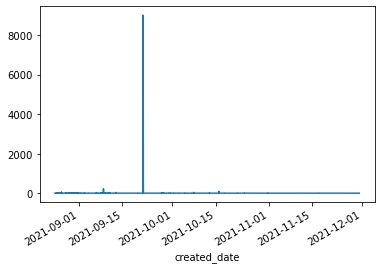

In [19]:
pudgy2["total_price_eth"].plot()

In [21]:
pudgy2["total_price_eth"].sort_values(ascending=False)

created_date
2021-09-21 15:34:37.671717    9.000000e+03
2021-09-08 20:57:01.119825    2.250000e+02
2021-10-16 01:09:14.812758    1.000000e+02
2021-08-26 08:37:28.798396    6.200000e+01
2021-10-08 00:51:04.412129    4.000000e+01
                                  ...     
2021-11-08 04:29:19.495419    1.000000e-02
2021-11-14 01:39:38.238604    2.000000e-05
2021-10-19 09:14:20.546606    1.700000e-08
2021-10-15 10:35:10.755520    1.000000e-08
2021-11-03 18:34:34.320431    6.000000e-09
Name: total_price_eth, Length: 6000, dtype: float64

In [26]:
pudgy2.loc[pudgy2["total_price_eth"] >= 100]


,id,quantity,total_price_eth,asset.id,asset.token_id,asset.num_sales,asset.name,seller.address,transaction.block_hash,transaction.block_number,transaction.id,transaction.timestamp,transaction.transaction_hash,transaction.transaction_index,winner_account.address
created_date,,,,,,,,,,,,,,,
2021-10-16 01:09:14.812758,1391222326,1,100.000002,32451912.0,2447,2.0,Pudgy Penguin #2447,0xbabecf3350b64fbc103edd7d61a541edaa91bc47,0xe34f0029df5250cdd557cd47ef738fa91ceee712a2da...,13425999,182292488,2021-10-16T01:08:28,0x2a60fc8c5e109a731294bd5f57704d387247b30ea80d...,59,0x8c0d2b62f133db265ec8554282ee60eca0fd5a9e
2021-09-21 15:34:37.671717,1015153246,1,9000.000251,32454181.0,4498,3.0,Pudgy Penguin #4498,0xfc229a3d9f8bff3f4c6d09a058cd2687e2b774d1,0xa483770eb3653ef0c5d57311cca8ddc05876f57290d0...,13269956,168335058,2021-09-21T15:34:18,0x33567ee97cce676a33f010004dc412549d3b557ed504...,16,0x1f0ea93d0b4fcd64fe38edcd7c84efcc4a951d97
2021-09-08 20:57:01.119825,814387402,1,224.999996,32456936.0,6873,2.0,Pudgy Penguin #6873,0x8adc269827c9cba96bae388a1e023acdab7f622d,0x95d26b6ce51eb1ef6312d2251513b6ce13ccb10f77a7...,13187396,161049463,2021-09-08T20:56:30,0x0d8a6fe4e5263bb6c6380f1551f03a97b4285b5003b9...,93,0x4c4a5490deefefa16f49a1a48c9acdc60f4117d0


After further investigating this, the 9000 ETH sale did not happen. This was not an Ethereum transaction, but a "DAI" transaction. This is a rare occurrence in collections that are primarily traded on Ethererum. We can safely remove this outlier from our data.  

In [27]:
dropthis1 = pd.Timestamp("2021-09-21 15:34:37.671717")
pudgy3 = pudgy2.drop(dropthis1)
pudgy3

,id,quantity,total_price_eth,asset.id,asset.token_id,asset.num_sales,asset.name,seller.address,transaction.block_hash,transaction.block_number,transaction.id,transaction.timestamp,transaction.transaction_hash,transaction.transaction_index,winner_account.address
created_date,,,,,,,,,,,,,,,
2021-11-30 04:55:10.583259,2245898989,1,1.1400,32451727.0,2473,6.0,Pudgy Penguin #2473,0x98b33d164e41d7a0a7eb6393d8e92d183f4a92bd,0xbc66ad48f303576f9287830714f57a3b974adfce78f2...,13712870,212307599,2021-11-30T04:54:42,0xa118f1d477e8e4915afeb4cf75d62d87dfbd37259c7b...,196,0x8b16008ce9cbea16c5152eb366cc35b478639af7
2021-11-30 04:51:55.670198,2245854433,1,2.5999,32458946.0,8726,5.0,Pudgy Penguin #8726,0x3d620bd5e05b3896081646e6cbedcbc9cb860d5f,0xee29688b98109e2f18943d58a6fa8f05c8c83b26d2fa...,13712847,212306027,2021-11-30T04:51:39,0xdbf25b08355444f2c8a75172661365e0978fc34ed4f4...,226,0x304a97c9a85c92c93ca24e0a85b69f892b67355e
2021-11-30 03:51:46.229835,2245023606,1,1.0990,32457972.0,7854,4.0,Pudgy Penguin #7854,0x9d81b6f001bd7e5fcd71713519aab5f27f2a8415,0x93ba725dd041e7d05a806a799c789ef15e0cb72dc28f...,13712597,212275246,2021-11-30T03:50:42,0xa55da48394f41280b33080086e8e135b9bc16d9a521d...,409,0x78b15fef736f94a717a8e8d29380ef87b0824827
2021-11-30 03:48:55.066759,2244984457,1,1.1499,32459104.0,8778,5.0,Pudgy Penguin #8778,0x3d620bd5e05b3896081646e6cbedcbc9cb860d5f,0xed19134161eff1cb6c3326733eb5fb1e455c5a48ac69...,13712585,212274170,2021-11-30T03:48:25,0xc416a5c30b70dbc8b2234d5da85a5c29048353477611...,201,0x78b15fef736f94a717a8e8d29380ef87b0824827
2021-11-30 03:48:38.868786,2244980842,1,1.1000,32458746.0,8469,4.0,Pudgy Penguin #8469,0x7055d2b309057d3396f7d005c8e1d61269b993a0,0x8a493330f77554374bd5bcec4b8e917b57d866304791...,13712584,212274051,2021-11-30T03:48:22,0xbb9566b1d1b868b2d7e2fbd640133e0c53f0696c471a...,56,0x4ac92d9a71724ed484e5e3ed61b290e18d825400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-24 06:17:21.650842,619139237,1,3.4000,32449454.0,629,1.0,Pudgy Penguin #629,0xb38bd68a6f0ba599808d65c7a9cf2a428105b680,0x8543082bb01e230eb43b266be894341142c27400d338...,13086357,152619323,2021-08-24T06:16:33,0xbeebb584e5d798c9a7a298946b091a03512a972b6cd4...,249,0x4f8c2d5397262653cd8956cb977a0ba3660210c7
2021-08-24 06:13:48.896476,619130758,1,3.0500,32453386.0,3875,7.0,Pudgy Penguin #3875,0x0e5d9b06291205dd02a28247c59cccb6517c36d8,0x1fedfba8f13d13df2c892a3be3909cac98e47193e43a...,13086344,152618212,2021-08-24T06:13:22,0x69fdc41d8c9e4b0457992a7377f638e6c6cbddbdb771...,27,0x561acd2d4ca85e07bde08006777f44a8bd016043
2021-08-24 06:13:00.189498,619128859,1,3.1890,32452776.0,3269,3.0,Pudgy Penguin #3269,0x6f5765b3bbde5f02df45f989badc5528e4bc66f7,0x4e026a6311da580deda33891bbe2b4d90e1424414a33...,13086339,152617985,2021-08-24T06:12:43,0xedf9513881b274fce2f69276d2568a17e9a07f69ae4b...,92,0xfc70c1f67f6826d8849c20b0ce1dea9ac39e0f38


<AxesSubplot:xlabel='created_date'>

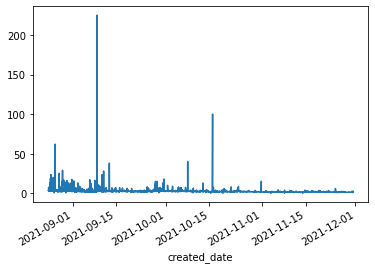

In [28]:
pudgy3["total_price_eth"].plot()

In [30]:
pudgy3.to_csv("pudgy_data.csv")

In [12]:
def save_as_csv(df, name):
#Takes in a dataframe and a filename specified by the user(as a string)'''
#Saves dataframe as a CSV file for import and use in other notebooks '''
    df.to_csv(name)
    return print("CSV saved")

In [3]:
meebit_events_1 = []
for offset in range(0,10000,50):
    url = "https://api.opensea.io/api/v1/events?only_opensea=true&collection_slug=meebits&occurred_before=2021-12-01T22:32:47.007226"
    querystring = {"offset":f"{offset}","limit":"50", 'event_type': 'successful'}
    headers = {"X-API-KEY": "API-KEY-HERE"}
    response = requests.request("GET", url, headers=headers, params=querystring)
    json = response.json()
    df = json_normalize(json['asset_events'])
    meebit_events_1.append(df)
    print(f"Offset is {offset} and {len(df)} assets added")
meeb_data = pd.concat([df for df in meebit_events_1], ignore_index=True, sort=False)
print("")
print("")

<ipython-input-3-613420738bf3>:8: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df = json_normalize(json['asset_events'])


Offset is 0 and 50 assets added
Offset is 50 and 50 assets added
Offset is 100 and 50 assets added
Offset is 150 and 50 assets added
Offset is 200 and 50 assets added
Offset is 250 and 50 assets added
Offset is 300 and 50 assets added
Offset is 350 and 50 assets added
Offset is 400 and 50 assets added
Offset is 450 and 50 assets added
Offset is 500 and 50 assets added
Offset is 550 and 50 assets added
Offset is 600 and 50 assets added
Offset is 650 and 50 assets added
Offset is 700 and 50 assets added
Offset is 750 and 50 assets added
Offset is 800 and 50 assets added
Offset is 850 and 50 assets added
Offset is 900 and 50 assets added
Offset is 950 and 50 assets added
Offset is 1000 and 50 assets added
Offset is 1050 and 50 assets added
Offset is 1100 and 50 assets added
Offset is 1150 and 50 assets added
Offset is 1200 and 50 assets added
Offset is 1250 and 50 assets added
Offset is 1300 and 50 assets added
Offset is 1350 and 50 assets added
Offset is 1400 and 50 assets added
Offset i

In [4]:
meeb_data

,approved_account,asset_bundle,auction_type,bid_amount,collection_slug,contract_address,created_date,custom_event_name,dev_fee_payment_event,duration,...,asset_bundle.asset_contract.dev_buyer_fee_basis_points,asset_bundle.asset_contract.dev_seller_fee_basis_points,asset_bundle.asset_contract.only_proxied_transfers,asset_bundle.asset_contract.opensea_buyer_fee_basis_points,asset_bundle.asset_contract.opensea_seller_fee_basis_points,asset_bundle.asset_contract.buyer_fee_basis_points,asset_bundle.asset_contract.seller_fee_basis_points,asset_bundle.asset_contract.payout_address,asset_bundle.permalink,asset_bundle.sell_orders
0,None,None,None,None,meebits,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,2021-12-01T20:50:50.090281,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,None,None,None,None,meebits,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,2021-12-01T20:50:49.923134,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,None,None,None,None,meebits,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,2021-12-01T20:50:49.856322,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,None,None,None,None,meebits,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,2021-12-01T20:50:50.115988,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,None,None,None,None,meebits,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,2021-12-01T20:50:49.766454,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,None,None,None,None,meebits,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,2021-05-30T19:12:02.975403,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9996,None,None,None,None,meebits,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,2021-05-30T18:50:36.096365,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,None,None,None,None,meebits,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,2021-05-30T18:32:04.253848,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9998,None,None,None,None,meebits,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,2021-05-30T17:48:52.245414,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
mb1 = opensea_to_dt(meeb_data)

mb2 = opensea_df_clean(mb1)

In [20]:
mb2

,id,quantity,total_price_eth,asset.id,asset.token_id,asset.num_sales,asset.name,seller.address,transaction.block_hash,transaction.block_number,transaction.id,transaction.timestamp,transaction.transaction_hash,transaction.transaction_index,winner_account.address
created_date,,,,,,,,,,,,,,,
2021-12-01 20:50:50.090281,2268993895,1,4.5000,23305487.0,4789,3.0,Meebit #4789,0x40a1e854cf0143b0f3cbf3605c16e5048d14bb53,0x1a5484ce16df34918fb0069467bef3de0d168a21efec...,13723252,213610352,2021-12-01T20:50:32,0x62d2db3d5f580bc04a7355bc2f54c48d637b401034de...,161,0xfc3e9a8d5090357d8b25013da0417314e80b01d4
2021-12-01 20:50:49.923134,2268993864,1,4.4000,23320147.0,8739,4.0,Meebit #8739,0x0d7569aa77d4e3b30be364cf8062fdbdc972fb54,0x1a5484ce16df34918fb0069467bef3de0d168a21efec...,13723252,213610341,2021-12-01T20:50:32,0x355797def74127ef731242117c231fa4e3862a0fa876...,158,0xfc3e9a8d5090357d8b25013da0417314e80b01d4
2021-12-01 20:50:49.856322,2268993851,1,4.5000,23297451.0,3272,3.0,Meebit #3272,0x1e06861976d489da925d58776be57e8a659b45f8,0x1a5484ce16df34918fb0069467bef3de0d168a21efec...,13723252,213610330,2021-12-01T20:50:32,0xa7965100c86fc81030d10ed68714ec09a6ff5af3e68f...,155,0xfc3e9a8d5090357d8b25013da0417314e80b01d4
2021-12-01 20:50:50.115988,2268993900,1,4.5000,23331208.0,16823,2.0,Meebit #16823,0xaa7c11e5998fc876ee90d1680e0be3de8f6ff506,0x1a5484ce16df34918fb0069467bef3de0d168a21efec...,13723252,213610344,2021-12-01T20:50:32,0xbe4cee901e56e4ecd469342c6531ce368894c807f093...,162,0xfc3e9a8d5090357d8b25013da0417314e80b01d4
2021-12-01 20:50:49.766454,2268993834,1,4.3000,23302693.0,19024,3.0,Meebit #19024,0xc73b768d1b12c553fdb355cac7bb03bfa75bc260,0x1a5484ce16df34918fb0069467bef3de0d168a21efec...,13723252,213610323,2021-12-01T20:50:32,0x4b3cf08f677891263bd18d5b6e1aa3500158d4f89206...,159,0xfc3e9a8d5090357d8b25013da0417314e80b01d4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-30 19:12:02.975403,182782069,1,1.5000,23322448.0,9133,3.0,Meebit #9133,0x4b172710306decf6cfd12e8f0e6b3382d02627ed,0xbd170c49808bc97f1e78aae136ed06e0ef63de1bb0b9...,12537504,120456342,2021-05-30T19:11:29,0xf81a09ca2b802284eac078c869bea40e73ddeda2be35...,157,0xe68705ee4f07365c31fb7927f7da89dfe710ec5b
2021-05-30 18:50:36.096365,182754379,1,1.4000,23322822.0,3367,1.0,Meebit #3367,0xcbb5e98c1890f60114748899e8344296c5e7209a,0xd076a80130076ce8116cb779ec25e89608bb367d2c5c...,12537407,120450163,2021-05-30T18:50:12,0x20e6ce8244bb70ee334ef1f98dfa5be8e68c3f3e4037...,140,0x2ff08e693319aba48bf8efb70d09b73b63b10e08
2021-05-30 18:32:04.253848,182734610,1,0.6916,23324931.0,125,6.0,Meebit #125,0x65ab793bd82cf8d9f035d4742b95e2c16a6b8849,0x9aa606379babc13cc38ea13c3f1899ca503f55918343...,12537321,120444971,2021-05-30T18:31:36,0xfc7356974f7dd0f2f5df357a56f764f1a32d422fd2e3...,58,0x2389b162e4d22ad91b8820da0652f6cf115f33d5


In [21]:
save_as_csv(mb2, "meebits.csv")

CSV saved


In [22]:
#guttercatgang
gutter_events_1 = []
for offset in range(0,10000,50):
    url = "https://api.opensea.io/api/v1/events?only_opensea=true&collection_slug=guttercatgang&occurred_before=2021-12-01T22:32:47.007226"
    querystring = {"offset":f"{offset}","limit":"50", 'event_type': 'successful'}
    headers = {"X-API-KEY": "API-KEY-HERE"}
    response = requests.request("GET", url, headers=headers, params=querystring)
    json = response.json()
    df = json_normalize(json['asset_events'])
    gutter_events_1.append(df)
    print(f"Offset is {offset} and {len(df)} assets added")
gutter_data = pd.concat([df for df in meebit_events_1], ignore_index=True, sort=False)
print("")
print("")

<ipython-input-22-91e473f9cfcf>:9: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df = json_normalize(json['asset_events'])


Offset is 0 and 50 assets added
Offset is 50 and 50 assets added
Offset is 100 and 50 assets added
Offset is 150 and 50 assets added
Offset is 200 and 50 assets added
Offset is 250 and 50 assets added
Offset is 300 and 50 assets added
Offset is 350 and 50 assets added
Offset is 400 and 50 assets added
Offset is 450 and 50 assets added
Offset is 500 and 50 assets added
Offset is 550 and 50 assets added
Offset is 600 and 50 assets added
Offset is 650 and 50 assets added
Offset is 700 and 50 assets added
Offset is 750 and 50 assets added
Offset is 800 and 50 assets added
Offset is 850 and 50 assets added
Offset is 900 and 50 assets added
Offset is 950 and 50 assets added
Offset is 1000 and 50 assets added
Offset is 1050 and 50 assets added
Offset is 1100 and 50 assets added
Offset is 1150 and 50 assets added
Offset is 1200 and 50 assets added
Offset is 1250 and 50 assets added
Offset is 1300 and 50 assets added
Offset is 1350 and 50 assets added
Offset is 1400 and 50 assets added
Offset i

In [23]:
gc1 = opensea_to_dt(gutter_data)

gc2 = opensea_df_clean(gc1)
gc2

,id,quantity,total_price_eth,asset.id,asset.token_id,asset.num_sales,asset.name,seller.address,transaction.block_hash,transaction.block_number,transaction.id,transaction.timestamp,transaction.transaction_hash,transaction.transaction_index,winner_account.address
created_date,,,,,,,,,,,,,,,
2021-12-01 20:50:50.090281,2268993895,1,4.5000,23305487.0,4789,3.0,Meebit #4789,0x40a1e854cf0143b0f3cbf3605c16e5048d14bb53,0x1a5484ce16df34918fb0069467bef3de0d168a21efec...,13723252,213610352,2021-12-01T20:50:32,0x62d2db3d5f580bc04a7355bc2f54c48d637b401034de...,161,0xfc3e9a8d5090357d8b25013da0417314e80b01d4
2021-12-01 20:50:49.923134,2268993864,1,4.4000,23320147.0,8739,4.0,Meebit #8739,0x0d7569aa77d4e3b30be364cf8062fdbdc972fb54,0x1a5484ce16df34918fb0069467bef3de0d168a21efec...,13723252,213610341,2021-12-01T20:50:32,0x355797def74127ef731242117c231fa4e3862a0fa876...,158,0xfc3e9a8d5090357d8b25013da0417314e80b01d4
2021-12-01 20:50:49.856322,2268993851,1,4.5000,23297451.0,3272,3.0,Meebit #3272,0x1e06861976d489da925d58776be57e8a659b45f8,0x1a5484ce16df34918fb0069467bef3de0d168a21efec...,13723252,213610330,2021-12-01T20:50:32,0xa7965100c86fc81030d10ed68714ec09a6ff5af3e68f...,155,0xfc3e9a8d5090357d8b25013da0417314e80b01d4
2021-12-01 20:50:50.115988,2268993900,1,4.5000,23331208.0,16823,2.0,Meebit #16823,0xaa7c11e5998fc876ee90d1680e0be3de8f6ff506,0x1a5484ce16df34918fb0069467bef3de0d168a21efec...,13723252,213610344,2021-12-01T20:50:32,0xbe4cee901e56e4ecd469342c6531ce368894c807f093...,162,0xfc3e9a8d5090357d8b25013da0417314e80b01d4
2021-12-01 20:50:49.766454,2268993834,1,4.3000,23302693.0,19024,3.0,Meebit #19024,0xc73b768d1b12c553fdb355cac7bb03bfa75bc260,0x1a5484ce16df34918fb0069467bef3de0d168a21efec...,13723252,213610323,2021-12-01T20:50:32,0x4b3cf08f677891263bd18d5b6e1aa3500158d4f89206...,159,0xfc3e9a8d5090357d8b25013da0417314e80b01d4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-30 19:12:02.975403,182782069,1,1.5000,23322448.0,9133,3.0,Meebit #9133,0x4b172710306decf6cfd12e8f0e6b3382d02627ed,0xbd170c49808bc97f1e78aae136ed06e0ef63de1bb0b9...,12537504,120456342,2021-05-30T19:11:29,0xf81a09ca2b802284eac078c869bea40e73ddeda2be35...,157,0xe68705ee4f07365c31fb7927f7da89dfe710ec5b
2021-05-30 18:50:36.096365,182754379,1,1.4000,23322822.0,3367,1.0,Meebit #3367,0xcbb5e98c1890f60114748899e8344296c5e7209a,0xd076a80130076ce8116cb779ec25e89608bb367d2c5c...,12537407,120450163,2021-05-30T18:50:12,0x20e6ce8244bb70ee334ef1f98dfa5be8e68c3f3e4037...,140,0x2ff08e693319aba48bf8efb70d09b73b63b10e08
2021-05-30 18:32:04.253848,182734610,1,0.6916,23324931.0,125,6.0,Meebit #125,0x65ab793bd82cf8d9f035d4742b95e2c16a6b8849,0x9aa606379babc13cc38ea13c3f1899ca503f55918343...,12537321,120444971,2021-05-30T18:31:36,0xfc7356974f7dd0f2f5df357a56f764f1a32d422fd2e3...,58,0x2389b162e4d22ad91b8820da0652f6cf115f33d5


In [25]:
save_as_csv(gc2, "guttercats.csv")

CSV saved


In [45]:
#this function imports a dataframe from your machine, turns the index into a datetime, and performs EDA functions
#you need to supply:
#csv_location is a string containing the location where your data is saved, for example: "data/NFTname.csv"
#your_df_name represents the name of the variable you want to save your dataframe to when you call the function
def starter_eda(csv_string):
    
    your_df_name = pd.read_csv(csv_string, index_col=0)
    your_df_name.index = pd.to_datetime(your_df_name.index)
    print("Data overview:")    
    print(your_df_name.describe())
    
    print("Historic sales data:")
    your_df_name["total_price_eth"].plot()
    
    #create datetime visualization columns
    your_df_name["year"] = your_df_name.index.year
    your_df_name["month"] = your_df_name.index.month
    your_df_name["hour"] = your_df_name.index.hour
    your_df_name["weekday"] = your_df_name.index.day_name()
    
    print("Amount of sales occurring on each day of the week:")
    #view sales stats for each day of the week
    weekdays = your_df_name["weekday"].value_counts()
    fig, ax = plt.subplots()
    x = weekdays.index
    y = weekdays
    sns.barplot(x=x, y=y)
    
    print("Amount of sales occurring historically per hour")    
    #view sales stats for each day of the week
    hourcounts = your_df_name["hour"].value_counts()
    fig, ax = plt.subplots()
    x = hourcounts.index
    y = hourcounts
    sns.barplot(x=x, y=y)
    
    return your_df_name

Data overview:
                 id      quantity  total_price_eth      asset.id  \
count  1.000000e+04  10000.000000     10000.000000  9.990000e+03   
mean   6.515127e+08      1.004700         5.663997  2.334913e+07   
std    4.566059e+08      0.228217        14.837597  1.654488e+05   
min    1.826182e+08      1.000000         0.000000  2.329564e+07   
25%    3.784922e+08      1.000000         2.500000  2.330542e+07   
50%    4.965954e+08      1.000000         3.968450  2.331632e+07   
75%    6.998351e+08      1.000000         5.550000  2.332241e+07   
max    2.268994e+09     20.000000      1000.000020  2.493355e+07   

       asset.token_id  asset.num_sales  transaction.block_number  \
count     9990.000000      9990.000000              1.000000e+04   
mean     10075.926527         2.818218              1.304846e+07   
std       5787.696225         1.575474              2.458497e+05   
min          3.000000         1.000000              1.253689e+07   
25%       4996.250000         2.

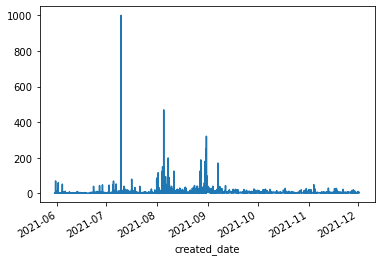

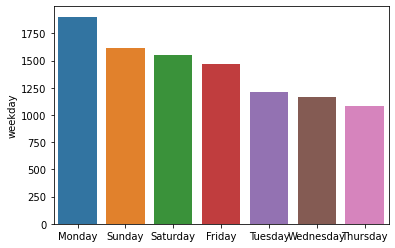

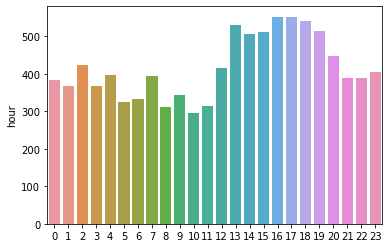

In [90]:
gcg = starter_eda("guttercats.csv")

In [91]:
gcg

,id,quantity,total_price_eth,asset.id,asset.token_id,asset.num_sales,asset.name,seller.address,transaction.block_hash,transaction.block_number,transaction.id,transaction.timestamp,transaction.transaction_hash,transaction.transaction_index,winner_account.address,year,month,hour,weekday
created_date,,,,,,,,,,,,,,,,,,,
2021-12-01 20:50:50.090281,2268993895,1,4.5000,23305487.0,4789.0,3.0,Meebit #4789,0x40a1e854cf0143b0f3cbf3605c16e5048d14bb53,0x1a5484ce16df34918fb0069467bef3de0d168a21efec...,13723252,213610352,2021-12-01T20:50:32,0x62d2db3d5f580bc04a7355bc2f54c48d637b401034de...,161,0xfc3e9a8d5090357d8b25013da0417314e80b01d4,2021,12,20,Wednesday
2021-12-01 20:50:49.923134,2268993864,1,4.4000,23320147.0,8739.0,4.0,Meebit #8739,0x0d7569aa77d4e3b30be364cf8062fdbdc972fb54,0x1a5484ce16df34918fb0069467bef3de0d168a21efec...,13723252,213610341,2021-12-01T20:50:32,0x355797def74127ef731242117c231fa4e3862a0fa876...,158,0xfc3e9a8d5090357d8b25013da0417314e80b01d4,2021,12,20,Wednesday
2021-12-01 20:50:49.856322,2268993851,1,4.5000,23297451.0,3272.0,3.0,Meebit #3272,0x1e06861976d489da925d58776be57e8a659b45f8,0x1a5484ce16df34918fb0069467bef3de0d168a21efec...,13723252,213610330,2021-12-01T20:50:32,0xa7965100c86fc81030d10ed68714ec09a6ff5af3e68f...,155,0xfc3e9a8d5090357d8b25013da0417314e80b01d4,2021,12,20,Wednesday
2021-12-01 20:50:50.115988,2268993900,1,4.5000,23331208.0,16823.0,2.0,Meebit #16823,0xaa7c11e5998fc876ee90d1680e0be3de8f6ff506,0x1a5484ce16df34918fb0069467bef3de0d168a21efec...,13723252,213610344,2021-12-01T20:50:32,0xbe4cee901e56e4ecd469342c6531ce368894c807f093...,162,0xfc3e9a8d5090357d8b25013da0417314e80b01d4,2021,12,20,Wednesday
2021-12-01 20:50:49.766454,2268993834,1,4.3000,23302693.0,19024.0,3.0,Meebit #19024,0xc73b768d1b12c553fdb355cac7bb03bfa75bc260,0x1a5484ce16df34918fb0069467bef3de0d168a21efec...,13723252,213610323,2021-12-01T20:50:32,0x4b3cf08f677891263bd18d5b6e1aa3500158d4f89206...,159,0xfc3e9a8d5090357d8b25013da0417314e80b01d4,2021,12,20,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-30 19:12:02.975403,182782069,1,1.5000,23322448.0,9133.0,3.0,Meebit #9133,0x4b172710306decf6cfd12e8f0e6b3382d02627ed,0xbd170c49808bc97f1e78aae136ed06e0ef63de1bb0b9...,12537504,120456342,2021-05-30T19:11:29,0xf81a09ca2b802284eac078c869bea40e73ddeda2be35...,157,0xe68705ee4f07365c31fb7927f7da89dfe710ec5b,2021,5,19,Sunday
2021-05-30 18:50:36.096365,182754379,1,1.4000,23322822.0,3367.0,1.0,Meebit #3367,0xcbb5e98c1890f60114748899e8344296c5e7209a,0xd076a80130076ce8116cb779ec25e89608bb367d2c5c...,12537407,120450163,2021-05-30T18:50:12,0x20e6ce8244bb70ee334ef1f98dfa5be8e68c3f3e4037...,140,0x2ff08e693319aba48bf8efb70d09b73b63b10e08,2021,5,18,Sunday
2021-05-30 18:32:04.253848,182734610,1,0.6916,23324931.0,125.0,6.0,Meebit #125,0x65ab793bd82cf8d9f035d4742b95e2c16a6b8849,0x9aa606379babc13cc38ea13c3f1899ca503f55918343...,12537321,120444971,2021-05-30T18:31:36,0xfc7356974f7dd0f2f5df357a56f764f1a32d422fd2e3...,58,0x2389b162e4d22ad91b8820da0652f6cf115f33d5,2021,5,18,Sunday


<AxesSubplot:xlabel='created_date'>

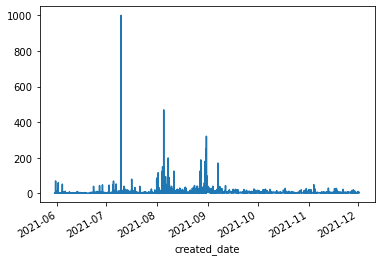

In [101]:
gcg["total_price_eth"].plot()

In [102]:
gcg["total_price_eth"].sort_values(ascending=False)[50:80]

created_date
2021-08-07 19:04:48.319724    51.300002
2021-07-05 04:39:05.258693    50.000001
2021-08-06 16:43:59.329492    50.000001
2021-08-08 00:37:37.322391    50.000001
2021-08-04 13:10:37.467667    50.000001
2021-09-06 21:41:24.842477    50.000001
2021-07-04 21:09:48.518387    49.000000
2021-08-06 16:41:32.263431    49.000000
2021-08-08 08:36:15.238455    49.000000
2021-11-04 04:26:39.775764    49.000000
2021-06-28 14:52:58.851640    47.999998
2021-07-02 15:46:41.394795    46.500000
2021-07-02 16:22:27.875229    44.999998
2021-08-07 12:08:22.669535    44.999998
2021-06-26 20:27:08.222132    44.181825
2021-09-11 11:44:13.894650    44.000001
2021-08-23 14:19:56.595297    44.000001
2021-08-06 20:56:50.748331    42.499999
2021-08-30 02:06:05.959632    41.500002
2021-08-25 09:31:27.762557    40.000000
2021-06-23 04:59:16.559600    40.000000
2021-07-11 19:18:44.592582    40.000000
2021-09-03 21:20:41.168832    40.000000
2021-08-23 14:31:48.530821    40.000000
2021-08-30 02:29:38.442808 

In [103]:
#import a datetime indexed dataframe 
#function will drop any null sales (with 0 eth transaction), resample TS to lowest sale every 4 hours, fill nulls
def prep_to_model(dt):
    dropzero = dt[dt["total_price_eth"] == 0.0]
    dt.drop(dropzero.index, inplace=True)
    ts = dt["total_price_eth"].resample('4H').min()
    ready_ts = ts.bfill()
    return ready_ts 

In [104]:
gcg_ts = prep_to_model(gcg)

<AxesSubplot:xlabel='created_date'>

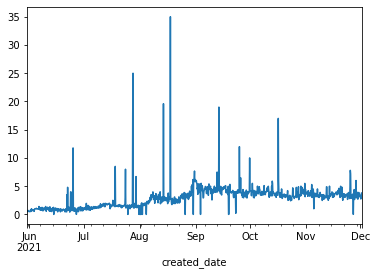

In [105]:
gcg_ts.plot()

In [106]:
gcg_ts.describe()

count    1.112000e+03
mean     2.887972e+00
std      2.129090e+00
min      3.750000e-12
25%      1.400000e+00
50%      3.056000e+00
75%      3.840250e+00
max      3.500000e+01
Name: total_price_eth, dtype: float64

In [107]:
gcg_ts.sort_values(ascending=False)[:20]

created_date
2021-08-18 00:00:00    34.999999
2021-07-28 08:00:00    25.000001
2021-08-14 04:00:00    19.600000
2021-09-13 20:00:00    19.000001
2021-07-28 04:00:00    17.980000
2021-10-16 16:00:00    17.000000
2021-09-25 04:00:00    11.989999
2021-06-25 04:00:00    11.770000
2021-09-30 20:00:00    10.000000
2021-07-18 12:00:00     8.500000
2021-07-24 04:00:00     8.000000
2021-11-25 12:00:00     7.800000
2021-08-31 08:00:00     7.680000
2021-09-12 20:00:00     7.500000
2021-11-25 16:00:00     7.200000
2021-07-30 00:00:00     6.700000
2021-08-31 04:00:00     6.500000
2021-09-25 20:00:00     6.488800
2021-08-31 16:00:00     6.176000
2021-08-30 12:00:00     6.165000
Name: total_price_eth, dtype: float64

In [108]:
gcg_ts

created_date
2021-05-30 16:00:00    0.50000
2021-05-30 20:00:00    0.60000
2021-05-31 00:00:00    0.70000
2021-05-31 04:00:00    0.69000
2021-05-31 08:00:00    0.70000
                        ...   
2021-12-01 04:00:00    3.39000
2021-12-01 08:00:00    2.73013
2021-12-01 12:00:00    3.15000
2021-12-01 16:00:00    3.79900
2021-12-01 20:00:00    3.79900
Freq: 4H, Name: total_price_eth, Length: 1112, dtype: float64

In [113]:
def create_model(ts): 
    arima = sm.tsa.statespace.SARIMAX(ts, 
                                      order=(0, 1, 1),  
                                      seasonal_order=(0, 0, 1, 36),
                                      enforce_stationarity=False, 
                                      enforce_invertibility=False)

    ts_model = arima.fit()
    print(ts_model.summary().tables[1])
    return ts_model

In [114]:
gcg_model = create_model(gcg_ts)

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9545      0.008   -117.133      0.000      -0.970      -0.939
ma.S.L36      -0.0204      0.057     -0.356      0.722      -0.133       0.092
sigma2         3.2227      0.018    177.986      0.000       3.187       3.258


In [116]:
import itertools

In [122]:
#do a gridsearch
p = d = q = range(0,2)
# Generate all different combinations of seasonal p, q and q triplets (use 36 for frequency)
pdqs = [(x[0], x[1], x[2], 36) for x in list(itertools.product(p, d, q))]

# Run a grid with pdq and seasonal pdq parameters calculated above and get the best AIC value
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(gcg_ts,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            output = mod.fit()
            ans.append([comb, combs, output.aic])
            print('ARIMA {} x {}36 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue

ARIMA (0, 0, 0) x (0, 0, 0, 24)36 : AIC Calculated =5994.296662382649
ARIMA (0, 0, 0) x (0, 0, 1, 24)36 : AIC Calculated =5445.617307084642
ARIMA (0, 0, 0) x (0, 1, 0, 24)36 : AIC Calculated =5074.601519195905
ARIMA (0, 0, 0) x (0, 1, 1, 24)36 : AIC Calculated =4459.706607290732
ARIMA (0, 0, 0) x (1, 0, 0, 24)36 : AIC Calculated =4952.736493372914
ARIMA (0, 0, 0) x (1, 0, 1, 24)36 : AIC Calculated =4548.571007298613
ARIMA (0, 0, 0) x (1, 1, 0, 24)36 : AIC Calculated =4688.67777354499
ARIMA (0, 0, 0) x (1, 1, 1, 24)36 : AIC Calculated =4469.4165924872805
ARIMA (0, 0, 1) x (0, 0, 0, 24)36 : AIC Calculated =5425.661228961778
ARIMA (0, 0, 1) x (0, 0, 1, 24)36 : AIC Calculated =5161.432714107437
ARIMA (0, 0, 1) x (0, 1, 0, 24)36 : AIC Calculated =5063.795045170153
ARIMA (0, 0, 1) x (0, 1, 1, 24)36 : AIC Calculated =4410.324598114012
ARIMA (0, 0, 1) x (1, 0, 0, 24)36 : AIC Calculated =4911.653700596442
ARIMA (0, 0, 1) x (1, 0, 1, 24)36 : AIC Calculated =4498.703359507204
ARIMA (0, 0, 1) x (1

In [124]:
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

pdq         (1, 1, 1)
pdqs    (0, 1, 1, 24)
aic           4300.04
Name: 59, dtype: object

In [135]:
ans_df.loc[ans_df['aic'].idxmin()][0]

(1, 1, 1)

first gridsearch with seasonal set to 12:
pdq         (1, 1, 1)
pdqs    (0, 1, 1, 12)
aic           4356.71
Name: 59, dtype: object

second gridsearch with seasonal set to 36: pdq         (1, 1, 1)
pdqs    (0, 1, 1, 36)
aic           4242.28
Name: 59, dtype: object

third gridsearch with seasonal set to 24: pdq         (1, 1, 1)
pdqs    (0, 1, 1, 24)
aic           4300.04
Name: 59, dtype: object

In [136]:
order_result = ans_df.loc[ans_df['aic'].idxmin()][0]
seasonal_result = ans_df.loc[ans_df['aic'].idxmin()][1]

In [137]:
def create_model(ts): 
    arima = sm.tsa.statespace.SARIMAX(ts, order=order_result,  
                                      seasonal_order=seasonal_result,
                                      enforce_stationarity=False, 
                                      enforce_invertibility=False)

    ts_model = arima.fit()
    print(ts_model.summary().tables[1])
    return ts_model

In [138]:
#insert your time series-ready data
def gridsearch(ts):

    p = d = q = range(0,2)
    pdq = list(itertools.product(p,d,q))
    pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

#run all possible combinations, return parameters that provide the best AIC score
    ans = []
    for comb in pdq:
        for combs in pdqs:
            try:
                mod = sm.tsa.statespace.SARIMAX(ts,
                                                order=comb,
                                                seasonal_order=combs,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)
                output = mod.fit()
                ans.append([comb, combs, output.aic])
                print('ARIMA {} x {}36 : AIC Calculated ={}'.format(comb, combs, output.aic))
            except:
                continue
                
    ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
    order_result = ans_df.loc[ans_df['aic'].idxmin()][0]
    seasonal_result = ans_df.loc[ans_df['aic'].idxmin()][1]
    print(ans_df.loc[ans_df['aic'].idxmin()])
    return order_result, seasonal_result

#make sure to save function as two parameters: order and seasonal, these will be fed into your model

In [139]:
def create_model(ts, order_result, seasonal_result): 
    arima = sm.tsa.statespace.SARIMAX(ts, order=order_result,  
                                      seasonal_order=seasonal_result,
                                      enforce_stationarity=False, 
                                      enforce_invertibility=False)

    ts_model = arima.fit()
    print(ts_model.summary().tables[1])
    return ts_model

In [140]:
order, seasonal = gridsearch(gcg_ts)

ARIMA (0, 0, 0) x (0, 0, 0, 12)36 : AIC Calculated =5994.296662382649
ARIMA (0, 0, 0) x (0, 0, 1, 12)36 : AIC Calculated =5493.7389979660575
ARIMA (0, 0, 0) x (0, 1, 0, 12)36 : AIC Calculated =5133.246873650607
ARIMA (0, 0, 0) x (0, 1, 1, 12)36 : AIC Calculated =4470.356588676349
ARIMA (0, 0, 0) x (1, 0, 0, 12)36 : AIC Calculated =5002.9285174595525
ARIMA (0, 0, 0) x (1, 0, 1, 12)36 : AIC Calculated =4514.9292440089785
ARIMA (0, 0, 0) x (1, 1, 0, 12)36 : AIC Calculated =4772.607264775497
ARIMA (0, 0, 0) x (1, 1, 1, 12)36 : AIC Calculated =4476.189966417173
ARIMA (0, 0, 1) x (0, 0, 0, 12)36 : AIC Calculated =5425.661228961778
ARIMA (0, 0, 1) x (0, 0, 1, 12)36 : AIC Calculated =5151.002054233017
ARIMA (0, 0, 1) x (0, 1, 0, 12)36 : AIC Calculated =5102.907520779767
ARIMA (0, 0, 1) x (0, 1, 1, 12)36 : AIC Calculated =4428.036409700351
ARIMA (0, 0, 1) x (1, 0, 0, 12)36 : AIC Calculated =4928.991485828992
ARIMA (0, 0, 1) x (1, 0, 1, 12)36 : AIC Calculated =4472.516176240666
ARIMA (0, 0, 1) x

C:\Users\saman\anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (1, 0, 1) x (1, 0, 1, 12)36 : AIC Calculated =4388.082388842365
ARIMA (1, 0, 1) x (1, 1, 0, 12)36 : AIC Calculated =4755.699093294981
ARIMA (1, 0, 1) x (1, 1, 1, 12)36 : AIC Calculated =4385.334097633104
ARIMA (1, 1, 0) x (0, 0, 0, 12)36 : AIC Calculated =4745.393998236502
ARIMA (1, 1, 0) x (0, 0, 1, 12)36 : AIC Calculated =4707.7630076809455
ARIMA (1, 1, 0) x (0, 1, 0, 12)36 : AIC Calculated =5483.499852350469
ARIMA (1, 1, 0) x (0, 1, 1, 12)36 : AIC Calculated =4704.114326829216
ARIMA (1, 1, 0) x (1, 0, 0, 12)36 : AIC Calculated =4707.7718323870995
ARIMA (1, 1, 0) x (1, 0, 1, 12)36 : AIC Calculated =4709.760401755197
ARIMA (1, 1, 0) x (1, 1, 0, 12)36 : AIC Calculated =5126.953026031404
ARIMA (1, 1, 0) x (1, 1, 1, 12)36 : AIC Calculated =4706.113326064504
ARIMA (1, 1, 1) x (0, 0, 0, 12)36 : AIC Calculated =4390.767946602044
ARIMA (1, 1, 1) x (0, 0, 1, 12)36 : AIC Calculated =4356.890965522571
ARIMA (1, 1, 1) x (0, 1, 0, 12)36 : AIC Calculated =5106.269840195689
ARIMA (1, 1, 1) x 

In [141]:
my_model = create_model(gcg_ts, order, seasonal)

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1613      0.012     13.885      0.000       0.139       0.184
ma.L1         -1.0290      0.011    -97.110      0.000      -1.050      -1.008
ma.S.L12      -1.0000     71.153     -0.014      0.989    -140.458     138.458
sigma2         2.9099    207.027      0.014      0.989    -402.855     408.675


In [8]:
#go to opensea, find the URL's tag associated with the collection, and insert into function as a string 
def pull_opensea_events(collection_name):

    events_list = []
    for i in range(0,10000,50):
        url = f"https://api.opensea.io/api/v1/events?only_opensea=true&collection_slug={collection_name}&occurred_before=2021-12-02T22:32:47.007226"
        querystring = {"offset":f"{i}","limit":"50", 'event_type': 'successful'}
        headers = {"X-API-KEY": "API-KEY-HERE"}
        response = requests.request("GET", url, headers=headers, params=querystring)
        json = response.json()
        df = json_normalize(json['asset_events'])
        events_list.append(df)
        print(f"Total {i} observations and {len(df)} observations added")
    collection_data = pd.concat([df for df in events_list], ignore_index=True, sort=False)
    print("")
    return collection_data

In [10]:
#convert the dataframe to a datetime index
def opensea_to_dt(df): 
    df["created_date"] = pd.to_datetime(df["created_date"])
    df2 = df.set_index(df["created_date"])
    return df2

#convert prices to ETH figures
def fix_prices(price):
    return price * 9.999999999999999e-19


#function to drop nulls, create clean ETH price column, and drop irrelevant columns
def opensea_df_clean(df):
    df["total_price"].dropna(inplace=True)
    df["total_price"] = pd.to_numeric(df["total_price"], downcast="float", errors="coerce")
    df['total_price_eth'] = df["total_price"].apply(fix_prices)
    df_columns_keep = ["id", "quantity", "total_price_eth", "asset.id", "asset.token_id", "asset.num_sales", 
                   "asset.name", "seller.address", "transaction.block_hash", "transaction.block_number",
                  "transaction.id", "transaction.timestamp", "transaction.transaction_hash", "transaction.transaction_index",
                  "winner_account.address"]
    new_df = df[df_columns_keep]
    return new_df

In [11]:
def save_as_csv(df, name):
#Takes in a dataframe and a filename specified by the user(as a string)'''
#Saves dataframe as a CSV file for import and use in other notebooks '''
    df.to_csv(name)
    return print("CSV saved")

In [9]:
ccnft = pull_opensea_events("cool-cats-nft")

<ipython-input-8-e1392d934965>:11: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df = json_normalize(json['asset_events'])


Total 0 observations and 50 observations added
Total 50 observations and 50 observations added
Total 100 observations and 50 observations added
Total 150 observations and 50 observations added
Total 200 observations and 50 observations added
Total 250 observations and 50 observations added
Total 300 observations and 50 observations added
Total 350 observations and 50 observations added
Total 400 observations and 50 observations added
Total 450 observations and 50 observations added
Total 500 observations and 50 observations added
Total 550 observations and 50 observations added
Total 600 observations and 50 observations added
Total 650 observations and 50 observations added
Total 700 observations and 50 observations added
Total 750 observations and 50 observations added
Total 800 observations and 50 observations added
Total 850 observations and 50 observations added
Total 900 observations and 50 observations added
Total 950 observations and 50 observations added
Total 1000 observations

Total 8250 observations and 50 observations added
Total 8300 observations and 50 observations added
Total 8350 observations and 50 observations added
Total 8400 observations and 50 observations added
Total 8450 observations and 50 observations added
Total 8500 observations and 50 observations added
Total 8550 observations and 50 observations added
Total 8600 observations and 50 observations added
Total 8650 observations and 50 observations added
Total 8700 observations and 50 observations added
Total 8750 observations and 50 observations added
Total 8800 observations and 50 observations added
Total 8850 observations and 50 observations added
Total 8900 observations and 50 observations added
Total 8950 observations and 50 observations added
Total 9000 observations and 50 observations added
Total 9050 observations and 50 observations added
Total 9100 observations and 50 observations added
Total 9150 observations and 50 observations added
Total 9200 observations and 50 observations added


In [12]:
cc1 = opensea_to_dt(ccnft)

cc2 = opensea_df_clean(cc1)

In [14]:
save_as_csv(cc2, "cool_cats_new.csv")

CSV saved
